Collecting Food security related index data from [Hunger-map](https://static.hungermapdata.org/api-catalog/). 

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import os
import pycountry
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
from pandas import json_normalize
import geocoord_conversion_f as fl #ll_to_os()

In [2]:
sns.set(style="whitegrid")

In [3]:
topfolder = '/Users/sahoko/GitHub/Food-insecurity-GP-forecasting/'
datafolder = os.path.join(topfolder,'Data/New/FoodSecurity')
os.chdir(topfolder)

In [4]:
def FSI_request(country_iso3, days_to_goback, num_day):
    today_dt = datetime.today()
    st_date_dt = today_dt - timedelta(days=days_to_goback)
    en_date_dt = st_date_dt + timedelta(days = num_day)
    st_date = st_date_dt.strftime('%Y-%m-%d')
    en_date = en_date_dt.strftime('%Y-%m-%d')
    r = requests.get(f"https://api.hungermapdata.org/v1/foodsecurity/country/{country_iso3}/region?date_start={st_date}&date_end={en_date}")
    print(r)
    
    return json_normalize(r.json())

In [49]:
country = 'Nigeria'

In [18]:
df = FSI_request('NGA', 500,99)

<Response [200]>


In [20]:
for i in [400,300,200,100]:
    df_tmp = FSI_request('NGA', i, 99)
    df = pd.concat([df,df_tmp],axis=0)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [21]:
df

,date,dataType,country.id,country.name,country.iso3,country.iso2,region.id,region.name,region.population,metrics.fcs.people,metrics.fcs.prevalence,metrics.rcsi.people,metrics.rcsi.prevalence,metrics.healthAccess.people,metrics.healthAccess.prevalence,metrics.marketAccess.people,metrics.marketAccess.prevalence,metrics.livelihoodCoping.people,metrics.livelihoodCoping.prevalence
0,2022-10-14,SURVEY,182,Nigeria,NGA,NG,2211,Adamawa,4946724,2294948,0.463933,2732768,0.552440,2424785.0,0.565917,3092825.0,0.625227,3468448.0,0.350580
1,2022-10-14,SURVEY,182,Nigeria,NGA,NG,2212,Akwa Ibom,5449818,923776,0.169506,682682,0.125267,945047.0,0.479958,1898106.0,0.348288,2709314.0,0.248569
2,2022-10-14,PREDICTION,182,Nigeria,NGA,NG,2213,Anambra,5494926,836871,0.152299,1361455,0.247766,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-14,SURVEY,182,Nigeria,NGA,NG,2215,Benue,6282546,1678055,0.267098,887623,0.141284,1667437.0,0.606308,2103503.0,0.334817,3033143.0,0.241395
4,2022-10-14,SURVEY,182,Nigeria,NGA,NG,2216,Borno,5884116,2259994,0.384084,3452869,0.586812,3035509.0,0.598452,3869612.0,0.657637,4342676.0,0.369017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,2024-02-25,PREDICTION,182,Nigeria,NGA,NG,2235,Oyo,7926302,1640352,0.206950,1642086,0.207169,NaN,NaN,NaN,NaN,NaN,NaN
3612,2024-02-25,PREDICTION,182,Nigeria,NGA,NG,65700,Bayelsa,2394195,528812,0.220873,500204,0.208924,NaN,NaN,NaN,NaN,NaN,NaN
3613,2024-02-25,PREDICTION,182,Nigeria,NGA,NG,65701,Ebonyi,2900754,660686,0.227764,615440,0.212166,NaN,NaN,NaN,NaN,NaN,NaN
3614,2024-02-25,PREDICTION,182,Nigeria,NGA,NG,65702,Ekiti,3263741,718067,0.220013,602239,0.184524,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.describe(include="all")

,date,dataType,country.id,country.name,country.iso3,country.iso2,region.id,region.name,region.population,metrics.fcs.people,metrics.fcs.prevalence,metrics.rcsi.people,metrics.rcsi.prevalence,metrics.healthAccess.people,metrics.healthAccess.prevalence,metrics.marketAccess.people,metrics.marketAccess.prevalence,metrics.livelihoodCoping.people,metrics.livelihoodCoping.prevalence
count,18416,18416,18416.0,18416,18416,18416,18416.000000,18416,1.841600e+04,1.841600e+04,18416.000000,1.841600e+04,18416.000000,1.391600e+04,13916.000000,1.391600e+04,13916.000000,1.391600e+04,13916.000000
unique,500,2,NaN,1,1,1,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-10-14,SURVEY,NaN,Nigeria,NGA,NG,NaN,Oyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,13916,NaN,18416,18416,18416,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,182.0,NaN,NaN,NaN,24536.743918,NaN,5.478874e+06,2.116490e+06,0.377374,1.306136e+06,0.240052,1.548501e+06,0.628820,1.870622e+06,0.329068,3.190611e+06,0.277940
std,NaN,NaN,0.0,NaN,NaN,NaN,30308.174361,NaN,2.531467e+06,1.474769e+06,0.156648,7.848614e+05,0.105353,8.492123e+05,0.082335,9.965676e+05,0.115413,1.603830e+06,0.037998
min,NaN,NaN,182.0,NaN,NaN,NaN,2211.000000,NaN,2.394195e+06,3.539440e+05,0.081429,2.408930e+05,0.076749,3.904760e+05,0.348123,4.978710e+05,0.163587,1.018636e+06,0.176319
25%,NaN,NaN,182.0,NaN,NaN,NaN,2222.000000,NaN,3.802539e+06,1.142786e+06,0.235460,7.176488e+05,0.162962,9.123708e+05,0.584186,1.102395e+06,0.259988,2.076670e+06,0.250617
50%,NaN,NaN,182.0,NaN,NaN,NaN,2231.000000,NaN,4.915325e+06,1.749638e+06,0.352705,1.095686e+06,0.215021,1.325006e+06,0.636818,1.608182e+06,0.294519,2.854231e+06,0.275084
75%,NaN,NaN,182.0,NaN,NaN,NaN,65701.000000,NaN,6.109666e+06,2.647696e+06,0.502746,1.759800e+06,0.278887,2.029624e+06,0.688159,2.518107e+06,0.354151,3.785363e+06,0.306145


In [29]:
df.tail(50)

,date,dataType,country.id,country.name,country.iso3,country.iso2,region.id,region.name,region.population,metrics.fcs.people,metrics.fcs.prevalence,metrics.rcsi.people,metrics.rcsi.prevalence,metrics.healthAccess.people,metrics.healthAccess.prevalence,metrics.marketAccess.people,metrics.marketAccess.prevalence,metrics.livelihoodCoping.people,metrics.livelihoodCoping.prevalence
3566,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2227,Kebbi,4915325,3575274,0.727373,1176753,0.239405,1366111.0,0.716831,1279095.0,0.260226,2872363.0,0.292184
3567,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2228,Kogi,4510378,1970723,0.436931,638538,0.141571,1069951.0,0.754853,1005020.0,0.222824,2222587.0,0.246386
3568,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2229,Kwara,3201976,1254290,0.391724,439077,0.137127,582730.0,0.592844,714219.0,0.223056,1422107.0,0.222067
3569,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2230,Lagos,12631475,2888805,0.228699,1698718,0.134483,1677965.0,0.572561,2677759.0,0.211991,4656123.0,0.184306
3570,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2231,Niger,6109666,3950204,0.646550,1014607,0.166066,1506380.0,0.787145,1417723.0,0.232046,3379848.0,0.276599
3571,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2232,Ogun,5408787,1947147,0.359997,744130,0.137578,1011394.0,0.577583,1180332.0,0.218225,2298380.0,0.212467
3572,2024-02-22,PREDICTION,182,Nigeria,NGA,NG,2234,Osun,4762863,1047261,0.219881,991514,0.208176,NaN,NaN,NaN,NaN,NaN,NaN
3573,2024-02-22,PREDICTION,182,Nigeria,NGA,NG,2235,Oyo,7926302,1631318,0.205811,1643455,0.207342,NaN,NaN,NaN,NaN,NaN,NaN
3574,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2239,Taraba,3402075,2347584,0.690045,698908,0.205436,869713.0,0.738402,1012511.0,0.297616,1953428.0,0.287094
3575,2024-02-22,SURVEY,182,Nigeria,NGA,NG,2240,Yobe,4340967,2811214,0.647601,2102356,0.484306,1624372.0,0.572388,2683082.0,0.618084,2711666.0,0.312334


Sorting the collected data

In [39]:
df = df.sort_values(by=['region.name', 'date'])
df['Datetime'] = pd.to_datetime(df['date'])
file = f"{datafolder}/{country}/{country}-{df['date'].min()}-{df['date'].max()}.csv"
df.to_csv(file)

In [60]:
fig = px.line(df.loc[df['dataType']!='PREDICTION',], x='Datetime', y='metrics.fcs.prevalence', color = 'region.name')
fig.show()

In [61]:
fig = px.line(df.loc[df['dataType']=='PREDICTION',], x='Datetime', y='metrics.fcs.prevalence', color = 'region.name')
fig.show()

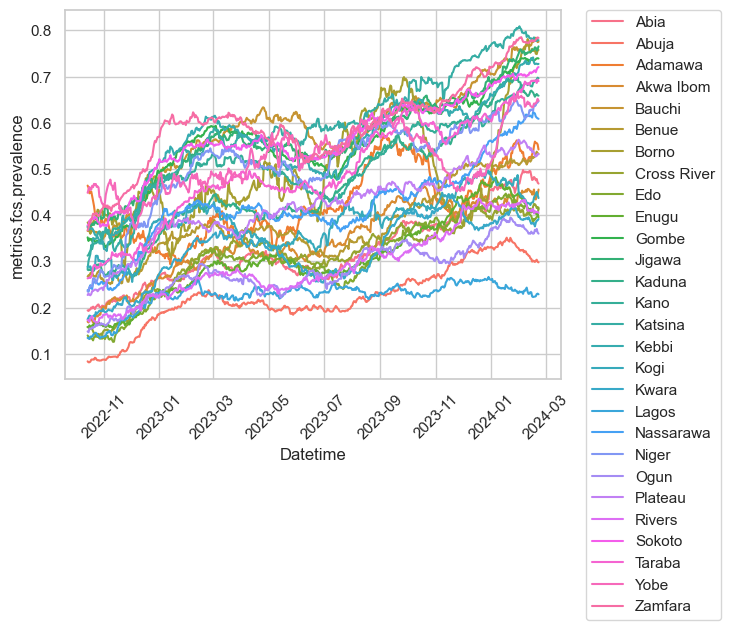

In [47]:
sns.lineplot(data=df.loc[df['dataType']!='PREDICTION',], x ='Datetime', y='metrics.fcs.prevalence', hue = 'region.name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

In [19]:
country_iso3 = 'BFA'
st_date = '2022-12-30'
en_date = '2022-12-30'
r = requests.get(f"https://api.hungermapdata.org/v1/foodsecurity/country/{country_iso3}/region?date_start={st_date}&date_end={en_date}")
df =  json_normalize(r.json())

In [21]:
df = df[['region.id','region.name','region.population']]
df

,region.id,region.name,region.population
0,900712,Boucle du Mouhoun,1816310
1,900713,Cascades,755896
2,900714,Centre,2623394
3,900715,Centre-Est,2623394
4,900716,Centre-Nord,1551284
5,900717,Centre-Ouest,1510412
6,900718,Centre-Sud,801374
7,900719,Est,1633891
8,900720,Hauts-Bassin,1983881
9,900721,Nord,1500082


In [27]:
country = 'Burkina-Faso'
datafolder = os.path.join(topfolder,'Data/New/output_data/')
file = f"{datafolder}/{country}/{country}-regionid.csv"
df.to_csv(file, index = False)